In [1]:
import os
import glob

In [55]:
imgdir = '/Users/andrewrenninger/Desktop/R/git/sensing/sensing/data/2750' 
images = [] 

for file in glob.glob(imgdir + os.sep + "*" + os.sep + "*.jpg"):
  images.append(file)

len(images)

27000

In [96]:
%matplotlib inline

from skimage.io import imread_collection
from skimage.io import imread

from skimage.color import rgb2gray

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

import re

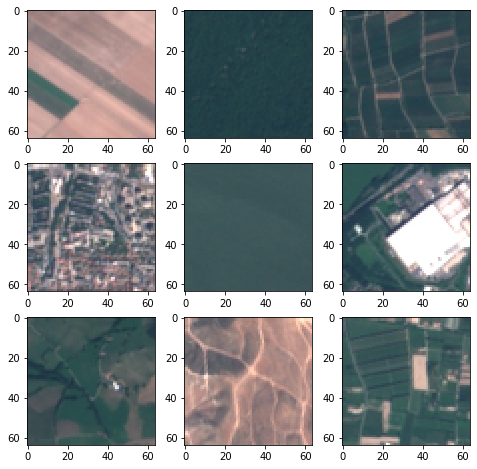

In [90]:
idx = np.random.randint(0, 27001, 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      slot = i*3+j
      path = images[idx[slot]]
      img = imread(open(path, "rb"))
      axs[i, j].imshow(img)
        
plt.show()

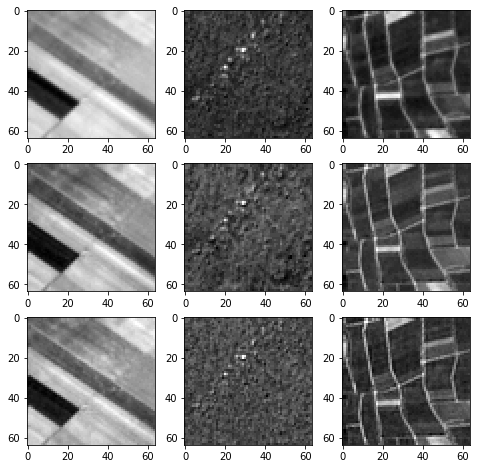

In [91]:
fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    slot = i
    path = images[idx[slot]]
    for j in np.arange(0, 3):
      img = imread(open(path, "rb"))
      axs[j, i].imshow(img[:,:, j], cmap = 'gray')
        
plt.show()

In [120]:
def vectorize(img):
    mat = imread(open(img, "rb"))
    bnw = rgb2gray(mat)
    out = bnw.squeeze().flatten()
    return out

In [115]:
series = pd.Series(images, name = "paths")
labels = series.str.split("/").str.get(10)

labels = np.array(labels)

In [116]:
mat = imread(open(path, "rb"))
bnw = rgb2gray(mat)
out = bnw.squeeze().flatten()

In [117]:
mat = np.zeros([labels.shape[0], out.shape[0]])

In [122]:
for i, tmp in series.to_frame().iterrows():
    mat[i] = vectorize(tmp.paths)

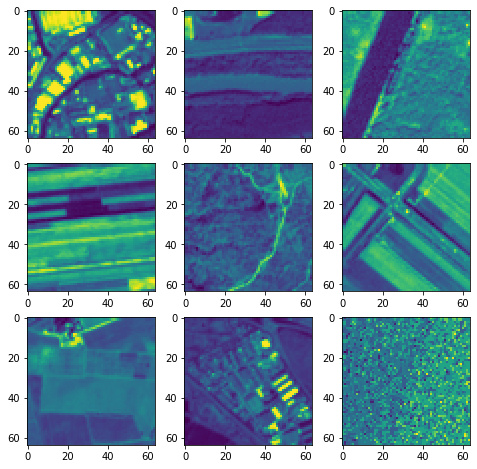

In [131]:
idx = np.random.randint(0, 27001, 9)

fig, axs = plt.subplots(3, 3, figsize = [8, 8])

for i in np.arange(0, 3):
    for j in np.arange(0, 3):
      num = i*3+j
      dat = mat[idx[num]].reshape([64, 64])
      axs[i, j].imshow(dat)
        
plt.show()